<a href="https://colab.research.google.com/github/MarekCoderslab/FloorHeating/blob/main/Gas_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gas consumption [m3/day] in the years

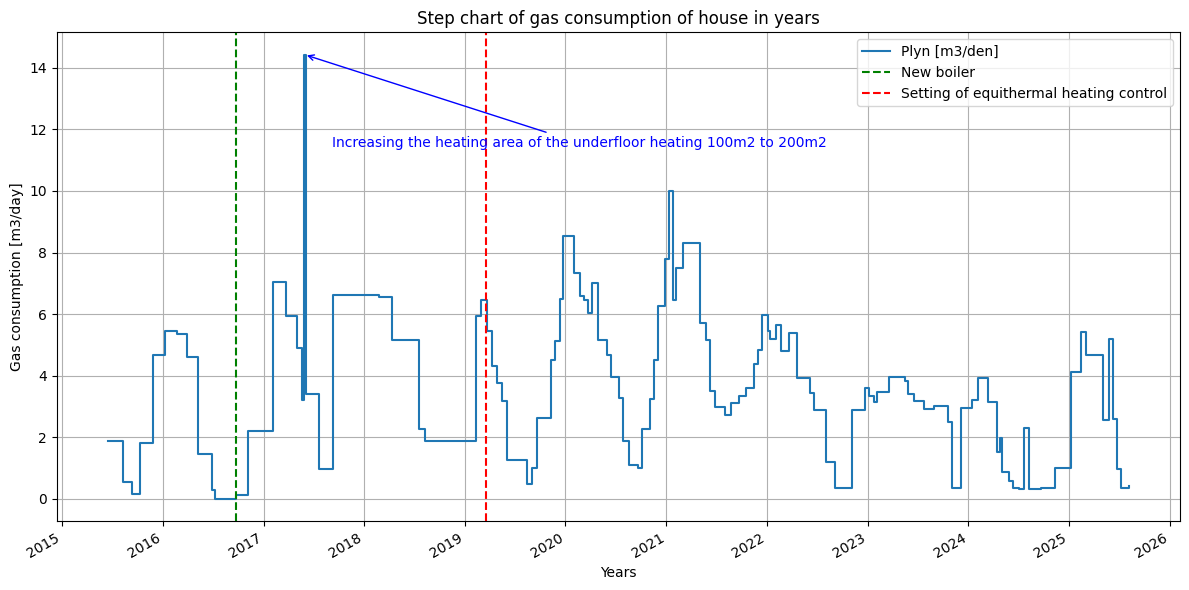

In [ ]:



import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Google Sheets setting
sheet_id = "17baRw1WgNKmUhdUqFFTEy7tN7PGzdNso-A471-maPc4"
sheet_name = "Sheet1"

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Loading
df = pd.read_csv(url, usecols=[0, 9], decimal=",")
df = df.rename(columns={df.columns[0]: 'Cas'})
df['Cas'] = pd.to_datetime(df['Cas'], dayfirst=True, errors='coerce')
df = df.set_index('Cas')
df.columns = df.columns.str.strip()
df = df.apply(pd.to_numeric, errors='coerce')

# Graph printing
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(ax=ax, drawstyle='steps-post')

# Najdi index a hodnotu peaku (např. maximum)
peak_y = df.iloc[:, 0].max()
peak_x = df.iloc[:, 0].idxmax()

# Přidej anotaci do grafu
plt.annotate('Increasing the heating area of the underfloor heating 100m2 to 200m2',
             xy=(peak_x, peak_y),
             xytext=(peak_x + pd.Timedelta(days=100), peak_y - 3),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=10, color='blue')

# Setting of the X-axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # 1x za rok
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Zobrazit jen rok

# Labels and style
ax.set_title("Step chart of gas consumption of house in years")
ax.set_xlabel("Years")
ax.set_ylabel("Gas consumption [m3/day]")
ax.grid(True)

# Vertical lines
ax.axvline(pd.Timestamp("2016-09-23"), color='green', linestyle='--', linewidth=1.5, label='New boiler')
ax.axvline(pd.Timestamp("2019-03-20"), color='red', linestyle='--', linewidth=1.5, label='Setting of equithermal heating control')

# Legend
ax.legend()
plt.tight_layout()
plt.show()



# Settings of equitherm regulation

## Function

In [ ]:

def hokejka(temp_in):
    if temp_in <= 5:
        return -0.6 * temp_in + 23
    else:
        return 20




# Graph

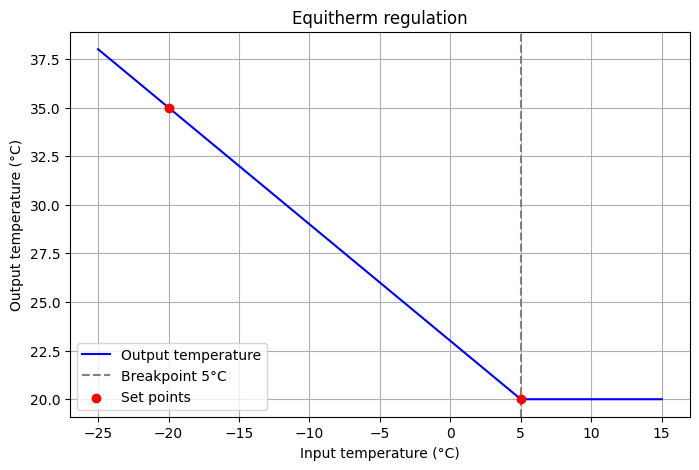

<Figure size 640x480 with 0 Axes>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Funkce typu "hokejka"
def hokejka(temp_in):
    if temp_in <= 5:
        return -0.6 * temp_in + 23
    else:
        return 20

# Data pro graf
temps_in = np.linspace(-25, 15, 200)
temps_out = [hokejka(t) for t in temps_in]

# Vykreslení
plt.figure(figsize=(8, 5))
plt.plot(temps_in, temps_out, label="Output temperature", color="blue")
plt.axvline(x=5, color="gray", linestyle="--", label="Breakpoint 5°C")
plt.scatter([-20, 5], [35, 20], color="red", zorder=5, label="Set points")
plt.title("Equitherm regulation")
plt.xlabel("Input temperature (°C)")
plt.ylabel("Output temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# Uložení grafu do souboru
plt.savefig("Equit_graf.png")  # uloží graf jako PNG




# Import outdoor temperature

In [ ]:
from google.colab import files
uploaded = files.upload()




import pandas as pd

df = pd.read_csv("Venkovni_Modul.csv", sep=";", header=2)
df.rename(columns={df.columns[1]: "Time"}, inplace=True)
print(df.head())


[ ]
# from google.colab import files
# uploaded = files.upload()



Saving Venkovni_Modul.csv to Venkovni_Modul.csv
    Timestamp                 Time  Temperature  Humidity
0  1707390000  2024/02/08 12:00:00          7.2        79
1  1707476400  2024/02/09 12:00:00          9.2        87
2  1707562800  2024/02/10 12:00:00          8.1        89
3  1707649200  2024/02/11 12:00:00          8.8        90
4  1707735600  2024/02/12 12:00:00          7.7        84


[]

## Formating and adding computed column

In [ ]:
import pandas as pd

df = pd.read_csv("Venkovni_Modul.csv", sep=";", header=2)
df.rename(columns={df.columns[1]: "Time"}, inplace=True)

# Přidáme sloupec Boiler_water
def hokejka(temp_in):
    if temp_in <= 5:
        return -0.6 * temp_in + 23
    else:
        return 20

df["Boiler_water"] = df["Temperature"].apply(hokejka)

# Ukázka 10 řádků
df.head(10)



      Timestamp                Time  Temperature  Humidity  Boiler_water
328  1735729200 2025-01-01 12:00:00         -0.2        84         23.12
329  1735815600 2025-01-02 12:00:00          5.1        71         20.00
330  1735902000 2025-01-03 12:00:00          1.2        84         22.28
331  1735988400 2025-01-04 12:00:00         -0.3        80         23.18
332  1736074800 2025-01-05 12:00:00         -1.8        87         24.08
333  1736161200 2025-01-06 12:00:00          3.0        90         21.20
334  1736247600 2025-01-07 12:00:00          4.3        84         20.42
335  1736334000 2025-01-08 12:00:00          2.9        84         21.26
336  1736420400 2025-01-09 12:00:00          5.8        85         20.00
337  1736506800 2025-01-10 12:00:00          2.0        74         21.80


IndentationError: unexpected indent (ipython-input-4170281182.py, line 20)

## Graph plotting

In [ ]:

df["Time"] = pd.to_datetime(df["Time"], errors="coerce")  # Na neplatná data dá NaT
print(df["Time"].head())
print(df["Time"].dtype)   # mělo by být datetime64[ns]

0   2024-02-08 12:00:00
1   2024-02-09 12:00:00
2   2024-02-10 12:00:00
3   2024-02-11 12:00:00
4   2024-02-12 12:00:00
Name: Time, dtype: datetime64[ns]
datetime64[ns]


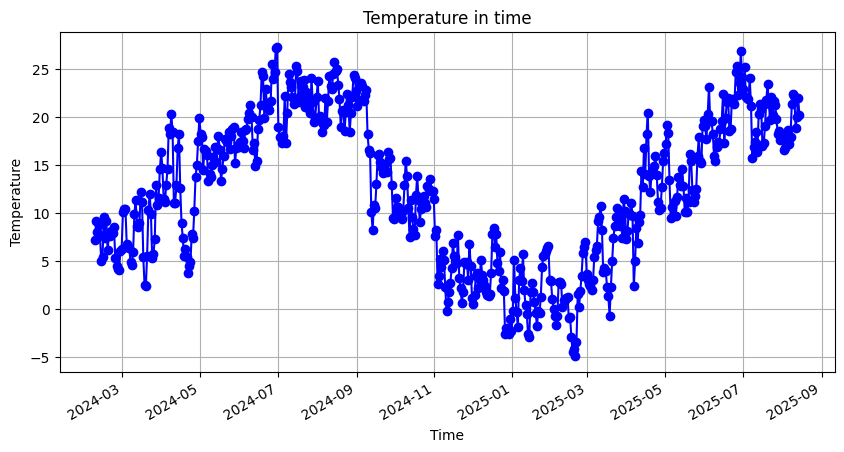

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["Temperature"], marker="o", linestyle="-", color="blue")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature in time")
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()




## Graph plotting 2

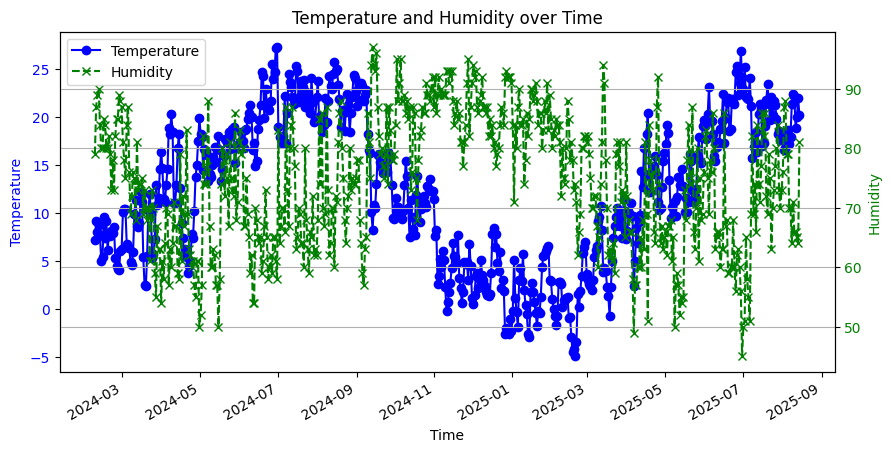

<Figure size 640x480 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))

# Hlavní osa y pro Temperature
line1, = ax1.plot(df["Time"], df["Temperature"], marker="o", linestyle="-", color="blue", label="Temperature")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Sekundární osa y pro Humidity
ax2 = ax1.twinx()
line2, = ax2.plot(df["Time"], df["Humidity"], marker="x", linestyle="--", color="green", label="Humidity")
ax2.set_ylabel("Humidity", color="green")
ax2.tick_params(axis='y', labelcolor="green")

plt.title("Temperature and Humidity over Time")
plt.grid(True)
plt.gcf().autofmt_xdate()

# Spojení legend jen s unikátními křivkami
plt.legend(handles=[line1, line2], loc="upper left")

plt.show()

# Uložení grafu do souboru
plt.savefig("TH_graf.png")  # uloží graf jako PNG





In [ ]:
!git config --global user.name "Marek Coderslab"
!git config --global user.email "marek.coderslab@gmail.com"



In [ ]:
# !git add Equit_graf.png        # Přidá soubor do „staging area“
# !git commit -m "Přidán Equit_graf.png"   # Vytvoří commit s popisem změny

# !git add Temp_graf.png        # Přidá soubor do „staging area“
# !git commit -m "Přidán Temp_graf.png"   # Vytvoří commit s popisem změny

# !git add TH_graf.png        # Přidá soubor do „staging area“
# !git commit -m "Přidán TH_graf.png"   # Vytvoří commit s popisem změny



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')



In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks
!ls




[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks'
/content
Equit_graf.png	sample_data  Temp_graf.png  TH_graf.png  Venkovni_Modul.csv


In [ ]:

!git init
!git add .
!git commit -m "Initial commit"
!git remote add origin https://github.com/MarekCoderslab/FloorHeating.git
!git push -u origin main
